# ADVANCED CLASSIFICATION PREDICT

# Predict Overview: EA Twitter Sentiment Classification
Companies would like to determine how people perceive climate change and whether or not they believe it is a real threat. 

Our mission is to deliver a precise and durable solution to this objective, granting companies the ability to tap into a wide range of consumer sentiments across various demographics and geographic regions. This, in turn, enhances their understanding and empowers them to shape future marketing strategies based on valuable insights.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

# Introduction

Dataset Description

Where is this data from?
- The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43,943 tweets were collected. Each tweet is labelled as one of 4 classes, which are described below.

Class Description

- 2 News: the tweet links to factual news about climate change

- 1 Pro: the tweet supports the belief of man-made climate change

- 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change

- -1 Anti: the tweet does not believe in man-made climate change Variable definitions

Features

sentiment: Which class a tweet belongs in (refer to Class Description above)

- message: Tweet body

- tweetid: Twitter unique id

The files provided

train.csv - You will use this data to train your model.

test.csv - You will use this data to test your model.

<a id="one"></a>

## 1. Importing Packages

<a href=#cont>Back to Table of Contents</a>

---

| ⚡ Description: Importing Packages ⚡                                                                                                    |
| :--------------------------------------------------------------------------------------------------------------------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---


In [238]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
import nltk
import re
import string
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
nltk.download('vader_lexicon')
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression #Import Logistic Regression from the sklearn
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_extraction.text import CountVectorizer #Import CountVectorizer from sklearn
from wordCloud import WordCloud,ImageColorGeneratorfrom sklearn.svm import SVC #Import SVC from sklearn 
from sklearn.utils import resample #Import the resampling module
from sklearn.feature_extraction.text import TfidfVectorizer #Import TFidfVectorizer from sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import  BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC #Import LinearSVC from the sklearn
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud,ImageColorGenerator
from nltk.util import ngrams



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


<a id="two"></a>

## 2. Loading the Data

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

| ⚡ Description: Loading the data ⚡                                                          |
| :------------------------------------------------------------------------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [239]:
df_test = pd.read_csv ("test_with_no_labels.csv")
df_test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \r\nPu...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [240]:
df_train = pd.read_csv('train.csv')
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


<a id="three"></a>

## 3. Exploratory Data Analysis (EDA)

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

| ⚡ Description: Exploratory data analysis ⚡                                                             |
| :------------------------------------------------------------------------------------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---

The EDA  includes:
- Summary analysis
- Null values
- Classes of tweets - Sentiments
- Number of words of tweets

## Summary analysis

In [241]:
df_test.describe()


,tweetid
count,10546.000000
mean,496899.936943
std,288115.677148
min,231.000000
25%,246162.500000
50%,495923.000000
75%,742250.000000
max,999983.000000


In [242]:
df_train.describe()


,sentiment,tweetid
count,15819.000000,15819.000000
mean,0.917504,501719.433656
std,0.836537,289045.983132
min,-1.000000,6.000000
25%,1.000000,253207.500000
50%,1.000000,502291.000000
75%,1.000000,753769.000000
max,2.000000,999888.000000


## Null values

In [243]:
df_test.isnull().sum()

message    0
tweetid    0
dtype: int64

In [244]:
df_train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [245]:
df_test.shape

(10546, 2)

In [246]:
df_train.shape

(15819, 3)

## Sentiments meaning

- Negative climate Change = -1
- Neutral = 0
- Positive Climate change = 1
- News = 2

## 3.1 Comparing the number of tweets of sentiments
- Distribution
- Pie chart
- Data cleaning
- Word cloud
- Top 20 words used

### 3.1.1 Bar chart showing the counts of tweets per sentiment 

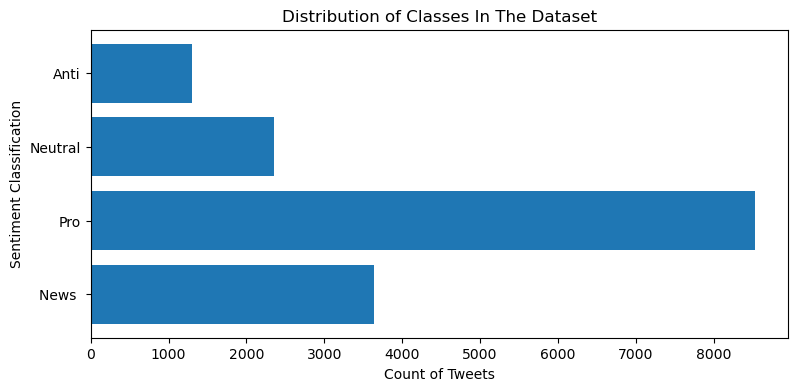

In [247]:
senti_counts = df_train["sentiment"].value_counts()
news = senti_counts[2] 
pro = senti_counts[1]   
neutral = senti_counts[0]
anti = senti_counts[-1]  

plt.figure( figsize=(9,4))
plt.barh(['News ','Pro','Neutral','Anti'], [news,pro,neutral,anti]) # horizontal bar graph to compare classes of tweets.
plt.colours = ['red', 'green', 'blue', 'orange']
plt.xlabel('Count of Tweets') #X-label of the data
plt.ylabel('Sentiment Classification') #Y_label of the data 
plt.title('Distribution of Classes In The Dataset') #Give the data a title 'Dataset lables distribution'
plt.show()

### 3.1.2 Pie chart showing the percentages of tweets per sentiment - Which one has the highest proportion between news and pro climate change

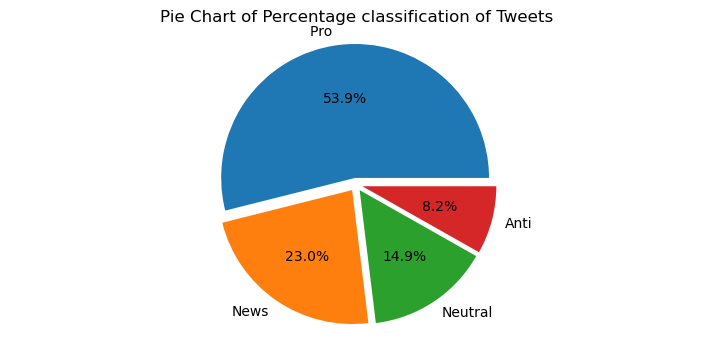

In [248]:
class_counts = df_train["sentiment"].value_counts()
plt.figure( figsize=(9,4))
plt.pie(class_counts, labels=['Pro ','News','Neutral','Anti'], explode=[0.05,0.05,0.05,0.05], autopct='%1.1f%%')
plt.title("Pie Chart of Percentage classification of Tweets ")
plt.axis('equal')
plt.show()

Insights:
- News has the highest percentage of tweets followed by Pro climate change, Neutral and anti climate change respectively

### 3.1.3 Data cleaning 
In order to process the tweet messages more effectively the tweets are cleaned using the clean function defined in the code cell below. The clean function does the following.

- Convert all tweet text to lowercase.
- Drop colums that are not important
- Remove @
- Remove punctuation.
- Remove numbers
- Remove stopwords
- Remove line-break code syntax
- Emojis

In [249]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [250]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


#### Removing the web-urls

In [251]:
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
df_train['CleanMessage'] = df_train['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)
df_train['CleanMessage'].head()

0    PolySciMajor EPA chief doesn't think carbon di...
1    It's not like we lack evidence of anthropogeni...
2    RT @RawStory: Researchers say we have three ye...
3    #TodayinMaker# WIRED : 2016 was a pivotal year...
4    RT @SoyNovioDeTodas: It's 2016, and a racist, ...
Name: CleanMessage, dtype: object

#### Converting every word to lower case

In [252]:
df_train['CleanMessage'] = df_train['CleanMessage'].str.lower()
df_train['CleanMessage'].head()

0    polyscimajor epa chief doesn't think carbon di...
1    it's not like we lack evidence of anthropogeni...
2    rt @rawstory: researchers say we have three ye...
3    #todayinmaker# wired : 2016 was a pivotal year...
4    rt @soynoviodetodas: it's 2016, and a racist, ...
Name: CleanMessage, dtype: object

#### Removing punctuation

In [253]:
def remove_punctuation(post):
    return ''.join([l for l in post if l not in string.punctuation])

In [254]:
df_train['CleanMessage'] = df_train['CleanMessage'].apply(remove_punctuation)
df_train['CleanMessage'].head()

0    polyscimajor epa chief doesnt think carbon dio...
1    its not like we lack evidence of anthropogenic...
2    rt rawstory researchers say we have three year...
3    todayinmaker wired  2016 was a pivotal year in...
4    rt soynoviodetodas its 2016 and a racist sexis...
Name: CleanMessage, dtype: object

In [255]:
# Replace all other characters with space except letters from a to z
df_train['CleanMessage'] = df_train['CleanMessage'].astype(str).apply(lambda x: re.sub("[^a-z\s]", "", x.lower()))
df_train['CleanMessage'].head()


0    polyscimajor epa chief doesnt think carbon dio...
1    its not like we lack evidence of anthropogenic...
2    rt rawstory researchers say we have three year...
3    todayinmaker wired   was a pivotal year in the...
4    rt soynoviodetodas its  and a racist sexist cl...
Name: CleanMessage, dtype: object

#### Stop words

In [256]:
from nltk.corpus import stopwords
stopwordlist = sorted(stopwords.words('english'))
print(stopwordlist)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn', "shouldn't", 'so', 'some',

In [257]:
stopwords = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stopwords])
df_train['CleanMessage'] = df_train['CleanMessage'].apply(lambda text: cleaning_stopwords(text))
df_train['CleanMessage'].head()

0    polyscimajor epa chief doesnt think carbon dio...
1      like lack evidence anthropogenic global warming
2    rt rawstory researchers say three years act cl...
3    todayinmaker wired pivotal year war climate ch...
4    rt soynoviodetodas racist sexist climate chang...
Name: CleanMessage, dtype: object

### 3.1.4 Word cloud showing top words used in every class

In [258]:
text = " ".join(i for i in df_train['CleanMessage'])
text = str(text)

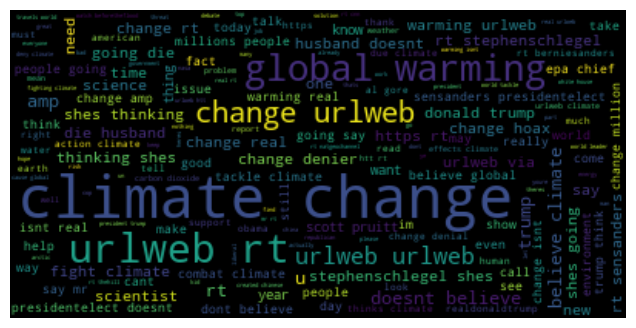

In [259]:
wordcloud = WordCloud()
tweet_cloud = wordcloud.generate(text)
plt.figure( figsize=(9,4))
plt.imshow(tweet_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

 ### 3.1.5 Top 20 words in the tweets

In [260]:
freq_dict = {}
words = text.split(" ")
for word in words:
    if word != " " and word !="":
        if word not in freq_dict:
            freq_dict[word] = 1
        else:
            freq_dict[word] += 1

In [261]:
sorted_freq_dict = sorted(freq_dict.items(), key=lambda x:x[1], reverse=True)[:21]
top_20_words = dict(sorted_freq_dict)

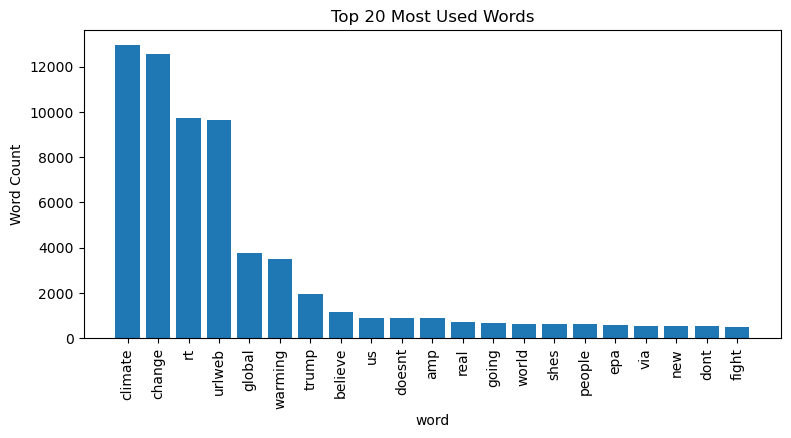

In [262]:
x_labels = list(top_20_words.keys())
values = list(top_20_words.values())

# Create the figure and axes
fig, ax = plt.subplots(figsize=(9,4))

# Plot the data
ax.bar(x_labels, values)

# Customize the plot
ax.set_xlabel('word')
ax.set_ylabel('Word Count')
ax.set_title('Top 20 Most Used Words')

# Rotate the x-labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()

The top of words used
- 1. Climate
- 2. Change
- 3. rt
- 4. Trump
- 5. Global
- 6. US
- 7. via
- 8. Says
- 9. EPA
- 10. New
- 11. Scientists
- 12. Trumps
- 13. Donald
- 14. Fight
- 15. China
- 16. Could
- 17. News
- 18. world
- 19. Scott
- 20. Paris

In [263]:
freq_dict = {}
words = text.split(" ")
for word in words:
    if word != " " and word !="":
        if word not in freq_dict:
            freq_dict[word] = 1
        else:
            freq_dict[word] += 1

In [264]:
sorted_freq_dict = sorted(freq_dict.items(), key=lambda x:x[1], reverse=True)[:21]
top_20_words = dict(sorted_freq_dict)

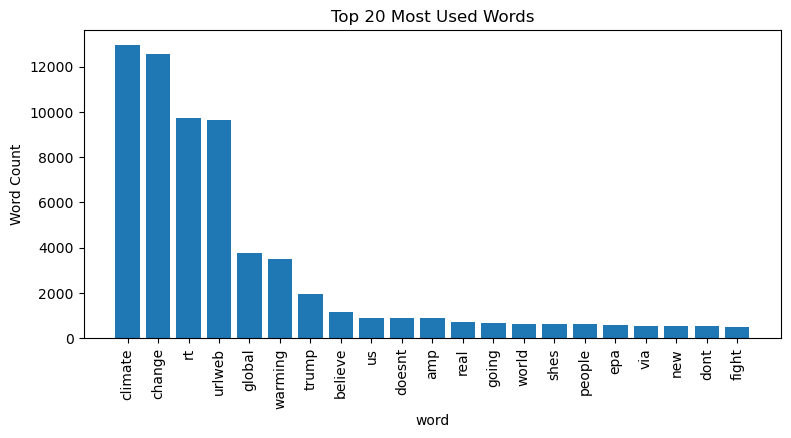

In [265]:
x_labels = list(top_20_words.keys())
values = list(top_20_words.values())

# Create the figure and axes
fig, ax = plt.subplots(figsize=(9,4))

# Plot the data
ax.bar(x_labels, values)

# Customize the plot
ax.set_xlabel('word')
ax.set_ylabel('Word Count')
ax.set_title('Top 20 Most Used Words')

# Rotate the x-labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()

In [266]:
text = " ".join(i for i in df_pro["message"])
text = str(text)

In [267]:
freq_dict = {}
words = text.split(" ")
for word in words:
    if word != " " and word !="":
        if word not in freq_dict:
            freq_dict[word] = 1
        else:
            freq_dict[word] += 1

In [268]:
sorted_freq_dict = sorted(freq_dict.items(), key=lambda x:x[1], reverse=True)[:21]
top_20_words = dict(sorted_freq_dict)

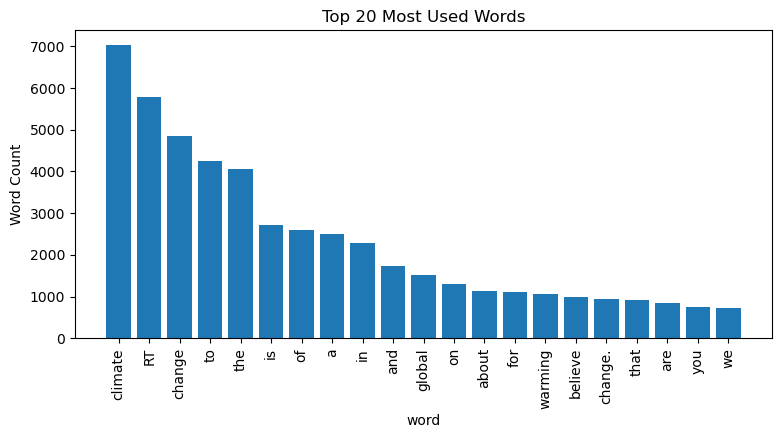

In [269]:
x_labels = list(top_20_words.keys())
values = list(top_20_words.values())

# Create the figure and axes
fig, ax = plt.subplots(figsize=(9,4))

# Plot the data
ax.bar(x_labels, values)

# Customize the plot
ax.set_xlabel('word')
ax.set_ylabel('Word Count')
ax.set_title('Top 20 Most Used Words')

# Rotate the x-labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()

## 3.2 Comparing the *length of the tweet* per categories
- Length of tweets
- Box plots
- Distribution bar graphs
- Summary of Stats
- Correlation

### 3.2.1 Length tweets

In [270]:
length = [len(tweet) for tweet in df_train['message']]
df_train['length'] = length

### 3.2.2 Box plot

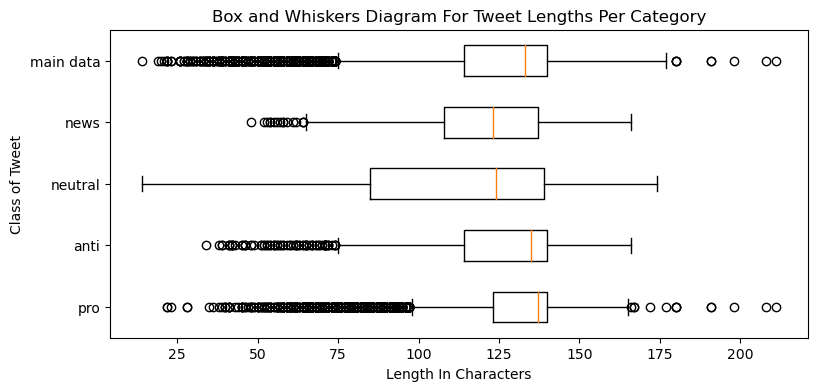

In [271]:
#creating class subsets for the datase

df_anti = df_train.copy()[df_train['sentiment'] == -1]
df_neutral = df_train.copy()[df_train['sentiment'] == 0]
df_pro = df_train.copy()[df_train['sentiment'] == 1]
df_news = df_train.copy()[df_train['sentiment'] == 2]

#storing the size data in separate variables

pro_len = df_pro['length']
neutral_len = df_neutral['length']
anti_len = df_anti['length']
news_len = df_news['length']
data_len = df_train['length']

#creating a list of all the length datasets

len_data = [pro_len, anti_len, neutral_len, news_len, data_len]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(9,4))

# Create the box plots
ax.boxplot(len_data, vert=False)

# Set the labels for each box plot
labels = ['pro', 'anti', 'neutral', 'news', 'main data']
ax.set_yticklabels(labels)

# Set the title and axis labels
plt.title('Box and Whiskers Diagram For Tweet Lengths Per Category')
plt.xlabel('Length In Characters')
plt.ylabel('Class of Tweet')

# Show the plot
plt.show()

### 3.2.3 Summary

In [272]:
print('mean of pro-climate is:  ', round(df_pro['length'].mean(),2))
round(df_pro['length'].describe(),2)

mean of pro-climate is:   129.13


count    8530.00
mean      129.13
std        20.00
min        22.00
25%       123.00
50%       137.00
75%       140.00
max       211.00
Name: length, dtype: float64

In [273]:
print('mean of anti-climate is:  ', round(df_anti['length'].mean(),2))
round(df_anti['length'].describe(),2)

mean of anti-climate is:   123.96


count    1296.00
mean      123.96
std        24.38
min        34.00
25%       114.00
50%       135.00
75%       140.00
max       166.00
Name: length, dtype: float64

In [274]:
print('mean of neutral-climate is:  ', round(df_neutral['length'].mean(),2))
round(df_neutral['length'].describe(),2)

mean of neutral-climate is:   111.12


count    2353.00
mean      111.12
std        32.46
min        14.00
25%        85.00
50%       124.00
75%       139.00
max       174.00
Name: length, dtype: float64

In [275]:
print('mean of news is:  ', round(df_news['length'].mean(),2))
round(df_news['length'].describe(),2)

mean of news is:   120.0


count    3640.00
mean      120.00
std        19.03
min        48.00
25%       108.00
50%       123.00
75%       137.00
max       166.00
Name: length, dtype: float64

### 3.2.4 Bar graph

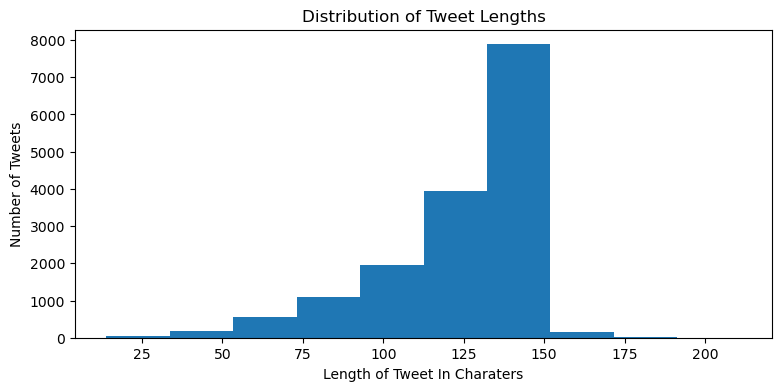

In [276]:
plt.figure( figsize=(9,4))
plt.hist(df_train['length'])
plt.title("Distribution of Tweet Lengths")
plt.xlabel("Length of Tweet In Charaters") #X-label of the data
plt.ylabel("Number of Tweets")      #Y_label of the data
plt.show()

### 3.2.5 Correlation between length of tweets and sentiment 

C:\Users\admin\AppData\Local\Temp\ipykernel_15912\28272172.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_train.corr()


Text(0.5, 1.0, 'Correlation with sentiments')

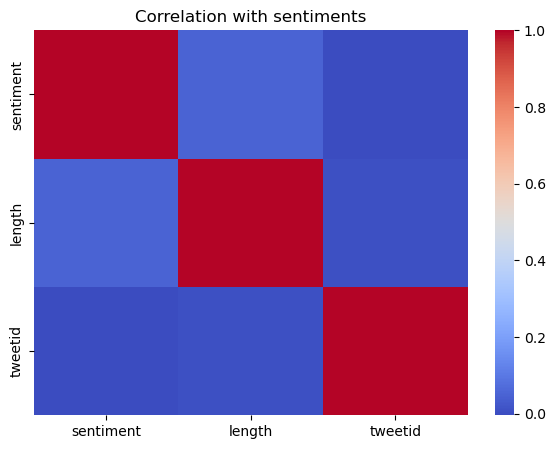

In [277]:
# Calculate the correlation matrix
correlation_matrix = df_train.corr()

# Calculate the correlations with the target variable
target_correlations = correlation_matrix['sentiment']

# Sort the features by their correlations with the target variable
sorted_features = target_correlations.abs().sort_values(ascending=False).index

# Reorder the correlation matrix
sorted_corr_matrix = correlation_matrix.loc[sorted_features, sorted_features]

# Create a heatmap for the sorted correlations without annotations
plt.figure(figsize=(7, 5))
sns.heatmap(sorted_corr_matrix, cmap='coolwarm')
plt.title('Correlation with sentiments')

<a id="four"></a>

## 4. Feature Engineering

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

| ⚡ Description: Data engineering ⚡                                                                                        |
| :------------------------------------------------------------------------------------------------------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---


Tweet id column has no siginificance in the project as it only shows unique twitter number

In [328]:
df_train.head()

,sentiment,message,CleanMessage,length,tokens
0,1,PolySciMajor EPA chief doesn't think carbon di...,"[polyscimajor, epa, chief, doesnt, think, carb...",140,"[polyscimajor, epa, chief, doesnt, think, carb..."
1,1,It's not like we lack evidence of anthropogeni...,"[like, lack, evidence, anthropogenic, global, ...",62,"[like, lack, evidence, anthropogenic, global, ..."
2,2,RT @RawStory: Researchers say we have three ye...,"[rt, rawstory, researchers, say, three, years,...",140,"[rt, rawstory, researchers, say, three, years,..."
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,"[todayinmaker, wired, pivotal, year, war, clim...",99,"[todayinmaker, wired, pivotal, year, war, clim..."
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...","[rt, soynoviodetodas, racist, sexist, climate,...",122,"[rt, soynoviodetodas, racist, sexist, climate,..."


In [279]:
df_train = df_train.drop('tweetid', axis=1)
df_train.head()

,sentiment,message,CleanMessage,length
0,1,PolySciMajor EPA chief doesn't think carbon di...,polyscimajor epa chief doesnt think carbon dio...,140
1,1,It's not like we lack evidence of anthropogeni...,like lack evidence anthropogenic global warming,62
2,2,RT @RawStory: Researchers say we have three ye...,rt rawstory researchers say three years act cl...,140
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,todayinmaker wired pivotal year war climate ch...,99
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",rt soynoviodetodas racist sexist climate chang...,122


### Cleaning also included:
- Tokenization
- Stemming
- Lemmatization

#### Applying Tokenisation

A tokeniser divides text into a sequence of tokens, which roughly correspond to "words"

In [280]:
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
tokeniser = TreebankWordTokenizer()
df_train['CleanMessage'] = df_train['CleanMessage'].apply(tokeniser.tokenize)
df_train['CleanMessage'].head()

0    [polyscimajor, epa, chief, doesnt, think, carb...
1    [like, lack, evidence, anthropogenic, global, ...
2    [rt, rawstory, researchers, say, three, years,...
3    [todayinmaker, wired, pivotal, year, war, clim...
4    [rt, soynoviodetodas, racist, sexist, climate,...
Name: CleanMessage, dtype: object

#### Applying Stemming

Stemming is the process of transforming to the root word. It uses an algorithm that removes common word-endings from English words, such as “ly,” “es,” “ed,” and “s.”

In [281]:
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data

In [282]:
df_train['tokens']= df_train['CleanMessage'].apply(lambda x: stemming_on_text(x))
df_train['tokens'].head()

0    [polyscimajor, epa, chief, doesnt, think, carb...
1    [like, lack, evidence, anthropogenic, global, ...
2    [rt, rawstory, researchers, say, three, years,...
3    [todayinmaker, wired, pivotal, year, war, clim...
4    [rt, soynoviodetodas, racist, sexist, climate,...
Name: tokens, dtype: object

#### Applying Lemmatization

Lemmatizing is the process of grouping words of similar meaning together. So, your root stem, meaning the word you end up with, is not something you can just look up in a dictionary, but you can look up a lemma.

In [283]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data

In [284]:
df_train['CleanMessage'] = df_train['CleanMessage'].apply(lambda x: lemmatizer_on_text(x))
df_train['CleanMessage'].head()

0    [polyscimajor, epa, chief, doesnt, think, carb...
1    [like, lack, evidence, anthropogenic, global, ...
2    [rt, rawstory, researchers, say, three, years,...
3    [todayinmaker, wired, pivotal, year, war, clim...
4    [rt, soynoviodetodas, racist, sexist, climate,...
Name: CleanMessage, dtype: object

We added the following features to modify our and for more insights:
- Bag of words
- N-grams
- TFIDVectorizer

### Text Feature extraction

Text feature extraction is the process of transforming what is essentially a list of words into a feature set that is usable by a classifier. The NLTK classifiers expect dict style feature sets, so we must therefore transform our text into a dict

#### Bag of word

The Bag of Words model is the simplest method; it constructs a word presence feature set from all the words in the text, indicating the number of times each word has appeared.

#### Comment

* There are 15819 rows and 24819 features for each word

In [287]:
def bag_of_words_count(words, word_dict={}):
    """ this function takes in a list of words and returns a dictionary 
        with each word as a key, and the value represents the number of 
        times that word appeared"""
    for word in words:
        if word in word_dict.keys():
            word_dict[word] += 1
        else:
            word_dict[word] = 1
    return word_dict

In [288]:
unique_sentiment = list(df_train["sentiment"].unique())
print(unique_sentiment)

[1, 2, 0, -1]


In [289]:
df_train.head()

,sentiment,message,CleanMessage,length,tokens
0,1,PolySciMajor EPA chief doesn't think carbon di...,"[polyscimajor, epa, chief, doesnt, think, carb...",140,"[polyscimajor, epa, chief, doesnt, think, carb..."
1,1,It's not like we lack evidence of anthropogeni...,"[like, lack, evidence, anthropogenic, global, ...",62,"[like, lack, evidence, anthropogenic, global, ..."
2,2,RT @RawStory: Researchers say we have three ye...,"[rt, rawstory, researchers, say, three, years,...",140,"[rt, rawstory, researchers, say, three, years,..."
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,"[todayinmaker, wired, pivotal, year, war, clim...",99,"[todayinmaker, wired, pivotal, year, war, clim..."
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...","[rt, soynoviodetodas, racist, sexist, climate,...",122,"[rt, soynoviodetodas, racist, sexist, climate,..."


In [290]:
personality = {}
for pp in unique_sentiment:
    df = df_train.groupby('sentiment')
    personality[pp] = {}
    for row in df.get_group(pp)['CleanMessage']:
        personality[pp] = bag_of_words_count(row, personality[pp])        

In [291]:
all_words = set()
for pp in unique_sentiment:
    for word in personality[pp]:
        all_words.add(word)

In [292]:
personality['all'] = {}
for pp in unique_sentiment:    
    for word in all_words:
        if word in personality[pp].keys():
            if word in personality['all']:
                personality['all'][word] += personality[pp][word]
            else:
                personality['all'][word] = personality[pp][word]

In [293]:
total_words = sum([v for v in personality['all'].values()])
total_words

192703

Text(0.5, 0, 'word frequency')

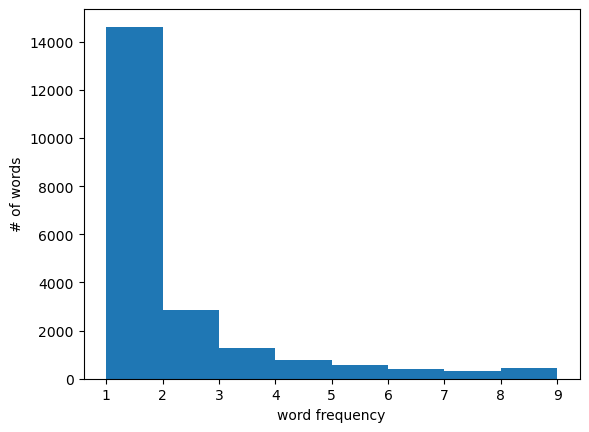

In [294]:
all_words = plt.hist([v for v in personality['all'].values() if v < 10],bins=8)
plt.ylabel("# of words")
plt.xlabel("word frequency")

In [295]:
len([v for v in personality['all'].values() if v == 1])

14621

In [296]:
len([v for v in personality['all'].values() if v == 10])

164

In [297]:
rare_words = [k for k, v in personality['all'].items() if v==1] 
print(rare_words[:100])

['brother', 'plumvillageom', 'struc', 'mxschell', 'fionaskywalker', 'fcmdcausley', 'primaries', 'yeseniatwigs', 'sidrurana', 'streams', 'jembloomfield', 'harsherheat', 'aj', 'tokimonsta', 'arcticlive', 'lodizzle', 'callieerwin', 'predators', 'ignoble', 'marknelsenkptv', 'daysofshame', 'herding', 'shreec', 'rainbows', 'tragedia', 'donnaphoto', 'pagesclimate', 'decisively', 'crim', 'iamsambee', 'sobering', 'champ', 'huffpostuktech', 'chnges', 'galivestock', 'techtoday', 'bsnlcorporate', 'aligning', 'assad', 'raullabrador', 'keepalive', 'buggwen', 'insanity', 'tulips', 'uni', 'posionoat', 'districts', 'lizhansonndp', 'ericajong', 'intend', 'packs', 'burdett', 'ecoconscious', 'cem', 'torturing', 'misandrism', 'adkeducation', 'vmataaa', 'natgeomag', 'doomers', 'felicitycarter', 'femmenucleaire', 'thenightridah', 'hellaroasty', 'whirlwind', 'framed', 'addresed', 'gregthykipp', 'kstreethipster', 'nosidonlook', 'johnfdaley', 'shoved', 'sylviaearle', 'davidsheen', 'brin', 'hcombs', 'rstiggers',

In [298]:
# Words that appear more than 10 times 
com_words = [k for k, v in personality['all'].items() if v>10] 
print(rare_words[:100])

['brother', 'plumvillageom', 'struc', 'mxschell', 'fionaskywalker', 'fcmdcausley', 'primaries', 'yeseniatwigs', 'sidrurana', 'streams', 'jembloomfield', 'harsherheat', 'aj', 'tokimonsta', 'arcticlive', 'lodizzle', 'callieerwin', 'predators', 'ignoble', 'marknelsenkptv', 'daysofshame', 'herding', 'shreec', 'rainbows', 'tragedia', 'donnaphoto', 'pagesclimate', 'decisively', 'crim', 'iamsambee', 'sobering', 'champ', 'huffpostuktech', 'chnges', 'galivestock', 'techtoday', 'bsnlcorporate', 'aligning', 'assad', 'raullabrador', 'keepalive', 'buggwen', 'insanity', 'tulips', 'uni', 'posionoat', 'districts', 'lizhansonndp', 'ericajong', 'intend', 'packs', 'burdett', 'ecoconscious', 'cem', 'torturing', 'misandrism', 'adkeducation', 'vmataaa', 'natgeomag', 'doomers', 'felicitycarter', 'femmenucleaire', 'thenightridah', 'hellaroasty', 'whirlwind', 'framed', 'addresed', 'gregthykipp', 'kstreethipster', 'nosidonlook', 'johnfdaley', 'shoved', 'sylviaearle', 'davidsheen', 'brin', 'hcombs', 'rstiggers',

In [299]:
# how many words appear more than 10 times?
print(len([v for v in personality['all'].values() if v >= 10]))
# how many words of the total does that account for?
occurs_more_than_10_times = sum([v for v in personality['all'].values() if v >= 10])
print(occurs_more_than_10_times)

2294
154064


In [300]:
occurs_more_than_10_times/total_words

0.7994893696517439

In [301]:
max_count = 10
remaining_word_index = [k for k, v in personality['all'].items() if v > max_count]
remaining_word_index

['idiots',
 'family',
 'lose',
 'since',
 'war',
 'get',
 'science',
 'gravity',
 'cars',
 'debating',
 'regardless',
 'ill',
 'peace',
 'access',
 'explore',
 'begins',
 'mayors',
 'failed',
 'simply',
 'paid',
 'halloween',
 'uses',
 'call',
 'bay',
 'allow',
 'motherboard',
 'agreement',
 'protection',
 'leaders',
 'toward',
 'unless',
 'eu',
 'hillaryclinton',
 'united',
 'continues',
 'discussing',
 'especially',
 'sensanders',
 'led',
 'india',
 'admits',
 'taxes',
 'ceo',
 'settled',
 'letter',
 'nice',
 'inequality',
 'deluged',
 'alaska',
 'envdefensefund',
 'reminder',
 'unchecked',
 'girl',
 'dioxide',
 'wondering',
 'fiction',
 'december',
 'politickels',
 'rather',
 'reindeer',
 'cdnpoli',
 'algore',
 'support',
 'doubts',
 'keeping',
 'san',
 'chance',
 'smart',
 'leadership',
 'hopes',
 'good',
 'chicago',
 'fire',
 'happens',
 'bad',
 'frankieboyle',
 'youre',
 'focus',
 'launch',
 'position',
 'f',
 'points',
 'ddlovato',
 'canadian',
 'officially',
 'urlweb',
 'wanted

### N-grams

In [303]:
def word_grams(words, min_n=1, max_n=4):
    s = []
    for n in range(min_n, max_n):
        for ngram in ngrams(words, n):
            s.append(' '.join(str(i) for i in ngram))
    return s

In [304]:
[x for x in ngrams(df_train.iloc[5000]['tokens'], 3)]

[('rt', 'richarddawkins', 'president'),
 ('richarddawkins', 'president', 'trump'),
 ('president', 'trump', 'may'),
 ('trump', 'may', 'destroy'),
 ('may', 'destroy', 'america'),
 ('destroy', 'america', 'maybe'),
 ('america', 'maybe', 'stop'),
 ('maybe', 'stop', 'destroying'),
 ('stop', 'destroying', 'world'),
 ('destroying', 'world', 'sign'),
 ('world', 'sign', 'climate'),
 ('sign', 'climate', 'change'),
 ('climate', 'change', 'petition'),
 ('change', 'petition', 'ht')]

### Term Frequency – Inverse Document Frequency (TF – IDF)

In [305]:
from sklearn.feature_extraction.text import TfidfVectorizer
obj = TfidfVectorizer()
corpus = df_train["message"]
X = obj.fit_transform(corpus)
print (X)

  (0, 17819)	0.29617953391365087
  (0, 29419)	0.17919926422611793
  (0, 31171)	0.4083807629436574
  (0, 6552)	0.0685938251926709
  (0, 13502)	0.06563679654204725
  (0, 30178)	0.17000387831408595
  (0, 29832)	0.27500470572274316
  (0, 2968)	0.11167930341655102
  (0, 29896)	0.10281932328060743
  (0, 12011)	0.10018392293695356
  (0, 20208)	0.09946418435998201
  (0, 5682)	0.21540366535326275
  (0, 17537)	0.28184336593277864
  (0, 14605)	0.09816618321079935
  (0, 8392)	0.24742439027234542
  (0, 5534)	0.21805790613752135
  (0, 27605)	0.1959115811865097
  (0, 8694)	0.16310935709469898
  (0, 6065)	0.22305131300999193
  (0, 9847)	0.17641536800457827
  (0, 21784)	0.4083807629436574
  (1, 3128)	0.52094265118164
  (1, 10106)	0.3932716987989639
  (1, 16408)	0.4980168835789958
  (1, 30027)	0.2199002975347319
  :	:
  (15817, 27728)	0.33170980422665547
  (15817, 7222)	0.3100987527608332
  (15817, 16862)	0.26955708032839304
  (15817, 13300)	0.181220288532438
  (15817, 4207)	0.21234098193339193
  (15817

<a id="five"></a>
​
## 5. Modelling
​
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>
​
---
​
| ⚡ Description: Modelling ⚡                                                                                                                |
| :------------------------------------------------------------------------------------------------------------------------------------------ |
| In this section, you are required to create one or more regression models that are able to accurately predict the twitter sentiments. |
​
---

### Pre processing

The line X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=50) is splitting the data into training and validation sets.

X and y are the feature matrix and target variable, respectively. X contains the features we use to make predictions, and y contains the corresponding target values (in this case, sentiment).

train_test_split() is a function provided by scikit-learn (a popular machine learning library) that is used to split a dataset into training and validation subsets.

The function takes the following arguments:

X: The feature matrix (independent variables). y: The target variable (dependent variable). test_size: This parameter specifies the proportion of the data that should be used for the validation set. In this case, it's set to 0.2, meaning 20% of the data will be used for validation, and the remaining 80% for training. random_state: This is a seed for the random number generator used in the data splitting process. Setting this to a specific value (e.g., 42) ensures that the split is reproducible.

train_test_split() returns four sets of data:

X_train: This contains the feature data for the training set. X_val: This contains the feature data for the validation set. y_train: This contains the target data for the training set. y_val: This contains the target data for the validation set. By splitting the data into training and validation sets, you can train your machine learning model on a portion of the data (X_train and y_train) and evaluate its performance on another portion that it hasn't seen during training (X_val and y_val). This allows us to estimate how well your model is likely to perform on unseen data (seen in Model Performance section).

In [307]:
#Splitting features and target variables
X = df_train['CleanMessage'] #X is the features of the cleaned tweets
y = df_train['sentiment']    #Y is the target variable which is the train sentiment

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) #Splitting train set into training and testing data
#Print out the shape of the training set and the testing set
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12655,)
(3164,)
(12655,)
(3164,)


C:\Users\admin\AppData\Local\Temp\ipykernel_15912\1374117344.py:21: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.set_xlim(-0.5, len(steps), 1)


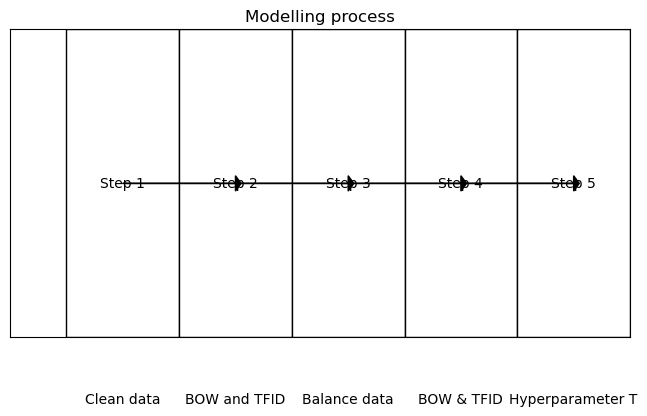

In [308]:
# Create a step-by-step flow diagram
steps = ['Step 1', 'Step 2', 'Step 3', 'Step 4', 'Step 5']
actions = ['Clean data', 'BOW and TFID', 'Balance data', 'BOW & TFID', 'Hyperparameter T']

fig, ax = plt.subplots(figsize=(8, 4))

# Draw rectangles for each step
for i, step in enumerate(steps):
    rect = mpatches.Rectangle((i, 0), 1, 1, ec='black', fc='White')
    ax.add_patch(rect)
    ax.text(i + 0.5, 0.5, step, ha='center', va='center', color='black')

# Draw arrows between steps
for i in range(len(steps) - 1):
    ax.arrow(i + 0.5, 0.5, 1, 0, head_width=0.05, head_length=0.05, fc='black', ec='black')

# Set axis limits and remove ticks
ax.set_xlim(-0.5, len(steps), 1)
ax.set_ylim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

# Add action labels below steps
for i, action in enumerate(actions):
    ax.text(i + 0.5, -0.2, action, ha='center', va='center', color='black')

plt.title('Modelling process')
plt.show()

## 5.A Modelling - Clean data

In building a model to classify twitter sentiments for climate change we used the following classifiers on clean data:
-  Logistic Regression
- Linear SVC
- Decision Trees
- Naive Bayes
- KNN

The modelling was done using the bag words and Term Frequency – Inverse Document Frequency (TF – IDF)

Scaling

In [317]:
cf = CountVectorizer() 

In [318]:
tfidf = TfidfVectorizer()

In [ ]:
X_train = cf.fit.transform(X_train)
X_test  = cf.fit.transform(X_test)

### 5.1 Logistic Regression - Bag of words
it makes use of a common S-shaped curve known as the logistic function. This curve is commonly known as a sigmoid. It solves the problem for the following reasons:

-  It squeezes the range of output values to exist only between 0 and 1.
-  It has a point of inflection, which can be used to separate the feature space into two distinct areas (one for each class).
-  It has shallow gradients at both its top and bottom, which can be mapped to zeroes or ones respectively with little ambiguity

In [323]:
lr = LogisticRegression()

In [ ]:
model = LogisticRegression() #Call logistic regression model and assign variable 'model'

text_lr = Pipeline([('cf', cf), ('clf', model)]) #Create a pipeline with the logistic model and tf-idf vectorizer


text_lr.fit(X_train, y_train) #Fit the training set

y_pred= text_lr.predict(X_test) #Fit the test set

print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print accuracy
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print f1 score
print(classification_report(y_test, y_pred)) #Print classification report

### 5.2 Linear SVM - Bag of words

Separate points using a  (p−1)
  dimensional hyperplane. This means that the SVM will construct a decision boundary such that points on the left are assigned a label of  A
  and points on the right are assigned a label of  B
 . When finding this separating hyperplane we wish to maximise the distance of the nearest points to the hyperplane. The technical term for this is maximum separating hyperplane. The data points which dictate where the separating hyperplane goes are called support vectors. 

In [ ]:
#Create a pipeline and make predictions of the bag of words using linearSVC
clf= Pipeline([('cf', cf),('clf',  LinearSVC())]) #Create a pipeline with the bag or words features and the linearSVC

clf.fit(X_train, y_train) #Fit the training data to the pipeline

y_pred = clf.predict(X_test) #Make predictions with the test data

print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print out the accuracy
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print out the f1 score
print(classification_report(y_test, y_pred)) #Print out the classification repor

The precision, recall and f1-score values for the positive class are higher, and this has to do with the class imbalance we referred to. There are more observations with the positive label, so the model gets better at classifiying those ones because it has more evidence of them.

The corresponding values in the neutral and negative class are lower.

The weighted f1-score here gives us a good indication using a single value of how well the model is performed. It is somewhere between the accuracies that the model achieved for each of class 0 and 1, but slightly in favour of class 1, of which there were more examples.

### 5.3 Decision Trees - Bag of Words

A decision tree is a decision support tool that uses a tree-like graph or model of decisions and their possible consequences. It is one way to display an algorithm that only contains conditional control statements.

Decision trees are extremely intuitive ways to classify objects or predict continuous values: you simply ask a series of questions designed to zero-in on the classification/prediction.

In [ ]:
clx= Pipeline([('cf', cf),('clx',  DecisionTreeClassifier(random_state=42))]) #Create a pipeline with the bag or words features and the linearSVC

clx.fit(X_train, y_train) #Fit the training data to the pipeline

y_pred = clx.predict(X_test) #Make predictions with the test data

print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print out the accuracy
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print out the f1 score
print(classification_report(y_test, y_pred)) #Print out the classification repor

The precision, recall and f1-score values for the positive class are higher, and this has to do with the class imbalance we referred to. There are more observations with the positive label, so the model gets better at classifiying those ones because it has more evidence of them.

The corresponding values in the neutral and negative class are lower.

The weighted f1-score here gives us a good indication using a single value of how well the model is performed. It is somewhere between the accuracies that the model achieved for each of class 0 and 1, but slightly in favour of class 1, of which there were more examples.

### 5.4 NAIVE BAYES (Bernoulli) - Bag of words

Naive Bayes is a classification algorithm that uses the principle of Bayes theorem to make classifications.The assumption is Naive because it often does not hold. The assumption of independence implies that the model assumes that there is zero correlation among the features. Hence, the joint probability distribution  P(X,Y)
  can be obtained from the marginal probability distributions  P(X)
  and  P(Y)
  simply by multiplication. We will use the above independence assumption, conditional probability rules, and Bayes theorem to develop some theory for how the Naive Bayes model works.

In [ ]:
naive_bayes =  BernoulliNB()
nb= Pipeline([('cf', cf),('nb',  naive_bayes)]) #Create a pipeline with the bag or words features and the linearSVC

nb.fit(X_train, y_train) #Fit the training data to the pipeline

y_pred = nb.predict(X_test) #Make predictions with the test data
print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print the accuracy
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print the f1-score
print(classification_report(y_test, y_pred)) #Print the classification report

The precision, recall and f1-score values for the positive class are higher, and this has to do with the class imbalance we referred to. There are more observations with the positive label, so the model gets better at classifiying those ones because it has more evidence of them.

The corresponding values in the neutral and negative class are lower.

The weighted f1-score here gives us a good indication using a single value of how well the model is performed. It is somewhere between the accuracies that the model achieved for each of class 0 and 1, but slightly in favour of class 1, of which there were more examples.

### 5.5 K Nearest Neighbours - Bag of words

In principle, this algorithm works by assigning the majority class of the N closest neighbors to the current data point. As such, absolutely no training is required for the algorithm! All we do is choose K (i.e. the number of neighbors to consider), choose a distance function to calculate proximity and we're good to go.

In [ ]:
knn = KNeighborsClassifier(10)
cnb= Pipeline([('cf', cf),('cnb', knn)]) #Create a pipeline with the bag or words features and the linearSVC

cnb.fit(X_train, y_train) #Fit the training data to the pipeline

y_pred = cnb.predict(X_test) #Make predictions with the test data
print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print the accuracy
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print the f1-score
print(classification_report(y_test, y_pred)) #Print the classification report

The precision, recall and f1-score values for the positive class are higher, and this has to do with the class imbalance we referred to. There are more observations with the positive label, so the model gets better at classifiying those ones because it has more evidence of them.

The corresponding values in the neutral and negative class are lower.

The weighted f1-score here gives us a good indication using a single value of how well the model is performed. It is somewhere between the accuracies that the model achieved for each of class 0 and 1, but slightly in favour of class 1, of which there were more examples.

In [ ]:
X_train = sca(X_train)

### 5.1.B.1. Logistic Regression - TF – IDF

In [ ]:
model = LogisticRegression(C=50,multi_class='ovr') #Call logistic regression model and assign variable 'model'

clf_sam = Pipeline([('tfidf', tfidf), ('clf', model)]) #Create a pipeline with the logistic model and tf-idf vectorizer


clf_sam.fit(X_train, y_train) #Fit the training set

y_pred= clf_sam.predict(X_test) #Fit the test set

print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print accuracy
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print f1 score
print(classification_report(y_test, y_pred)) #Print classification report

The precision, recall and f1-score values for the positive class are higher, and this has to do with the class imbalance we referred to. There are more observations with the positive label, so the model gets better at classifiying those ones because it has more evidence of them.

The corresponding values in the neutral and negative class are lower.

The weighted f1-score here gives us a good indication using a single value of how well the model is performed. It is somewhere between the accuracies that the model achieved for each of class 0 and 1, but slightly in favour of class 1, of which there were more examples.

### 5.1.B.2. Linear SVC - TF – IDF

In [ ]:
## create a pipeline and fit it with a Linear Support Vector Classifier

classifier = LinearSVC() #Call LinearSVC and assign the variable 'classifier'

clft = Pipeline([('tfidf', tfidf), ('clf', classifier)]) #Create a pipeline with the tdidf

clft.fit(X_train, y_train) #Fit the model
y_pred = clft.predict(X_test) #Make predictions and assign the variable 'y_pred'

print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print the accuracy
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print the f1-score
print(classification_report(y_test, y_pred)) #Print the classification report

The precision, recall and f1-score values for the positive class are higher, and this has to do with the class imbalance we referred to. There are more observations with the positive label, so the model gets better at classifiying those ones because it has more evidence of them.

The corresponding values in the neutral and negative class are lower.

The weighted f1-score here gives us a good indication using a single value of how well the model is performed. It is somewhere between the accuracies that the model achieved for each of class 0 and 1, but slightly in favour of class 1, of which there were more examples.

### 5.1.B.3. Decision Trees - TF – IDF

In [ ]:
## create a pipeline and fit it with a Linear Support Vector Classifier
classifier =  DecisionTreeClassifier(random_state=42) #Call LinearSVC and assign the variable 'classifier'

clf = Pipeline([('tfidf', tfidf), ('clf', classifier)]) #Create a pipeline with the tdidf

clf.fit(X_train, y_train) #Fit the model
y_pred = clf.predict(X_test) #Make predictions and assign the variable 'y_pred'

print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print the accuracy
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print the f1-score
print(classification_report(y_test, y_pred)) #Print the classification report


The precision, recall and f1-score values for the positive class are higher, and this has to do with the class imbalance we referred to. There are more observations with the positive label, so the model gets better at classifiying those ones because it has more evidence of them.

The corresponding values in the neutral and negative class are lower.

The weighted f1-score here gives us a good indication using a single value of how well the model is performed. It is somewhere between the accuracies that the model achieved for each of class 0 and 1, but slightly in favour of class 1, of which there were more examples.

### 5.1.B.4. Naive Bayes - TF – IDF

In [ ]:
## create a pipeline and fit it with a Linear Support Vector Classifier

classifier = BernoulliNB() #Call LinearSVC and assign the variable 'classifier'

clf = Pipeline([('tfidf', tfidf), ('clf', classifier)]) #Create a pipeline with the tdidf

clf.fit(X_train, y_train) #Fit the model
y_pred = clf.predict(X_test) #Make predictions and assign the variable 'y_pred'

print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print the accuracy
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print the f1-score
print(classification_report(y_test, y_pred)) #Print the classification report

The precision, recall and f1-score values for the positive class are higher, and this has to do with the class imbalance we referred to. There are more observations with the positive label, so the model gets better at classifiying those ones because it has more evidence of them.

The corresponding values in the neutral and negative class are lower.

The weighted f1-score here gives us a good indication using a single value of how well the model is performed. It is somewhere between the accuracies that the model achieved for each of class 0 and 1, but slightly in favour of class 1, of which there were more examples.

### 5.1.B.5. K Nearest Neighbour - TF – IDF

In [ ]:
## create a pipeline and fit it with a Linear Support Vector Classifier


Classifier =  KNeighborsClassifier(50) #Call LinearSVC and assign the variable 'classifier'

clf = Pipeline([('tfidf', tfidf), ('clf', classifier)]) #Create a pipeline with the tdidf

clf.fit(X_train, y_train) #Fit the model
y_pred = clf.predict(X_test) #Make predictions and assign the variable 'y_pred'

print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print the accuracy
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print the f1-score
print(classification_report(y_test, y_pred)) #Print the classification report


The precision, recall and f1-score values for the positive class are higher, and this has to do with the class imbalance we referred to. There are more observations with the positive label, so the model gets better at classifiying those ones because it has more evidence of them.

The corresponding values in the neutral and negative class are lower.

The weighted f1-score here gives us a good indication using a single value of how well the model is performed. It is somewhere between the accuracies that the model achieved for each of class 0 and 1, but slightly in favour of class 1, of which there were more examples.

In [ ]:
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100]

results = []

for k in ks:
    print('Fitting KNN model with k = {:d}'.format(k))
    knn = KNeighborsClassifier(k)
    run_time = %timeit -q -o clf.fit(X_train, y_train)


clf = Pipeline([('tfidf', tfidf), ('clf', knn)]) #Create a pipeline with the tdidf

clf.fit(X_train, y_train) #Fit the model
y_pred = clf.predict(X_test) #Make predictions and assign the variable 'y_pred'

print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print the accuracy
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print the f1-score
print(classification_report(y_test, y_pred)) #Print the classification report


# 5.B Dealing with Imbalances

Class imbalance occurs when the number of observations across different class labels are unevenly distributed. In training our classification model, it is preferable for all classes to have a relatively even split of observations. 

In [ ]:
senti_counts = df_train["sentiment"].value_counts()
news = senti_counts[2] 
pro = senti_counts[1]   
neutral = senti_counts[0]
anti = senti_counts[-1]  

plt.figure( figsize=(9,4))
plt.barh(['News ','Pro','Neutral','Anti'], [news,pro,neutral,anti]) # horizontal bar graph to compare classes of tweets.
plt.colours = ['red', 'green', 'blue', 'orange']
plt.xlabel('Count of Tweets') #X-label of the data
plt.ylabel('Sentiment Classification') #Y_label of the data 
plt.title('Distribution of Classes In The Dataset') #Give the data a title 'Dataset lables distribution'
plt.show()

Resampling
two variants of the most common method available: resampling. Put simply, resampling methods involve modifying the number of observations in each class as follows:

- Downsampling - taking a random subset of the majority class small enough to match the number of observations in the minority class.

- Upsampling - taking repeated random samples from the minority class until we have as many observations as the majority class. This grows the size of the minority class by effectively duplicating observations at random.

In [ ]:
df_majority = df_train.copy()[df_train['sentiment'] == 1]
df_minority1 = df_train.copy()[df_train['sentiment'] == 0]
df_minority2 = df_train.copy()[df_train['sentiment'] == 2]
df_minority3 = df_train.copy()[df_train['sentiment'] == -1]


# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=5000,     # Using a benchmark of 3640
                                 random_state=123) # reproducible results
#Upsampling the least minority class
df_minority_up = resample(df_minority1, 
                        replace=True,    # sample without replacement
                        n_samples=5000,     # to match the second majority class
                        random_state=123) # reproducible results

df_minority_up1 = resample(df_minority2, 
                        replace=True,    # sample without replacement
                        n_samples=5000,     # to match the second majority class
                        random_state=123) # reproducible results

df_minority_up2 = resample(df_minority3, 
                        replace=True,    # sample without replacement
                        n_samples=5000,     # to match the second majority class
                        random_state=123) # reproducible results

# Combine minority class with downsampled majority class
df_resampled = pd.concat([df_majority_downsampled,df_minority_up,df_minority_up1, df_minority_up2])
 
# Display new class counts
df_resampled.sentiment.value_counts()

In [ ]:
X = df_resampled['message']
y = df_resampled['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

### 5.1 B Resampled Logical Regression - bag of words

In [ ]:
model = LogisticRegression(C=20,multi_class='ovr') #Call logistic regression model and assign variable 'model'

clf_sam1 = Pipeline([('cf', cf), ('clf', model)]) #Create a pipeline with the logistic model and bag-of-words


clf_sam1.fit(X_train, y_train) #Fit the training set

y_pred= clf_sam1.predict(X_test) #Fit the test set

print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print accuracy
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print f1 score
print(classification_report(y_test, y_pred)) #Print classification report

In [ ]:
# Assuming 'text_data' is a list of text documents
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_train)
from sklearn.preprocessing import MaxAbsScaler 

scaler = MaxAbsScaler()
X_scaled = scaler.fit_transform(X_tfidf) 

### 5.1 B Resampled Logical Regression - TF-DF

In [ ]:
model = LogisticRegression(C=350,multi_class='ovr') #Call logistic regression model and assign variable 'model'

clf_sam1 = Pipeline([('tfidf', tfidf), ('clf', model)]) #Create a pipeline with the logistic model and bag-of-words


clf_sam1.fit(X_train, y_train) #Fit the training set

y_pred= clf_sam1.predict(X_test) #Fit the test set

print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print accuracy
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print f1 score
print(classification_report(y_test, y_pred)) #Print classification report

Balancing the dataset has lead to a significant improvement in the model. The upsampled dataset is performing way better than the model of the original dataset. However, due to downsampling of the data, we see that the pro class f1 score and recall are significantly lower want the rest of the classes

Pro class has a significantly lower f1 score now and recall score

The balance now makes it easier to make predictions on the other classes and seems to be performing much better in this regards

### 5.2.B Resampled Linear SVC - TF-DF

In [ ]:
clf_SVC= Pipeline([('cf', cf),('clf',  LinearSVC())]) #Create a pipeline with the bag or words features and the linearSVC

clf_SVC.fit(X_train, y_train) #Fit the training data to the pipeline

y_pred = clf_SVC.predict(X_test) #Make predictions with the test data

print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print out the accuracy
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print out the f1 score
print(classification_report(y_test, y_pred)) #Print out the classification report

### 5.2.B Resampled Linear SVC - TF-ID

In [ ]:
clf_SVC= Pipeline([('tfidf', tfidf),('clf',  LinearSVC())]) #Create a pipeline with the bag or words features and the linearSVC

clf_SVC.fit(X_train, y_train) #Fit the training data to the pipeline

y_pred = clf_SVC.predict(X_test) #Make predictions with the test data

print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print out the accuracy
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print out the f1 score
print(classification_report(y_test, y_pred)) #Print out the classification report

The model for linear SVC seems to be getting a high accuracy and high f1 score, which is good however it still struggles to locate the pro sentiments as good as it does the other models.

Pro sentiments are and news sentiments are lower on the precisioin but news seem to have high recall and high f1 rating.

Neutral seems to be consistent accorss all predictions

Negative sentiments seem to be performing very weel, more than all the classes

### non Linear SVC - TF-DF

In [ ]:
## create a pipeline and fit it with a  Support Vector Classifier


classifier = SVC(kernel='rbf', C=60, gamma='scale') #Call the SVC with the kernel='rbf' parameter

clf_nlsvc = Pipeline([('tfidf', tfidf), ('clf', classifier)]) #Add the SVC model to the pipeline

clf_nlsvc.fit(X_train, y_train) #Fit the training data
y_pred = clf_nlsvc.predict(X_test) #Make predictions to the test set and assign the variable 'y_pred'

print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print the accuracy
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print the f1 score
print(classification_report(y_test, y_pred)) #Print out the classification

### 5.3 B Resampled Decision Trees -  bag of words

In [ ]:
knn = DecisionTreeClassifier(random_state=42)
cnt= Pipeline([('cf', cf),('cnt', knn)]) #Create a pipeline with the bag or words features and the linearSVC

cnb.fit(X_train, y_train) #Fit the training data to the pipeline

y_pred = cnb.predict(X_test) #Make predictions with the test data
print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print the accuracy
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print the f1-score
print(classification_report(y_test, y_pred)) #Print the classification report

### 5.3 B Resampled Decision Trees - TF_DF

In [ ]:
knn = DecisionTreeClassifier(random_state=42)
cntt= Pipeline([('tfidf', tfidf),('cnb', knn)]) #Create a pipeline with the bag or words features and the linearSVC

cnb.fit(X_train, y_train) #Fit the training data to the pipeline

y_pred = cnb.predict(X_test) #Make predictions with the test data
print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print the accuracy
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print the f1-score
print(classification_report(y_test, y_pred)) #Print the classification report

The model for linear SVC seems to be getting a high accuracy and high f1 score, which is good however it still struggles to locate the pro sentiments as good as it does the other models.

Pro sentiments are and news sentiments are lower on the precisioin but news seem to have high recall and high f1 rating.

Neutral seems to be consistent accorss all predictions

Negative sentiments seem to be performing very weel, more than all the classes

### 5.4. B Resampled Naive Bayes - Bag of words

In [ ]:
naive_bayes =  BernoulliNB()
cnb= Pipeline([('cf', cf),('cnb',  naive_bayes)]) #Create a pipeline with the bag or words features and the linearSVC

cnb.fit(X_train, y_train) #Fit the training data to the pipeline

y_pred = cnb.predict(X_test) #Make predictions with the test data
print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print the accuracy
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print the f1-score
print(classification_report(y_test, y_pred)) #Print the classification report

### 5.4. B Resampled Naive Bayes - TF-DF

In [ ]:
naive_bayes =  BernoulliNB()
cnb= Pipeline([('tfidf', tfidf),('cnb',  naive_bayes)]) #Create a pipeline with the bag or words features and the linearSVC

cnb.fit(X_train, y_train) #Fit the training data to the pipeline

y_pred = cnb.predict(X_test) #Make predictions with the test data
print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print the accuracy
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print the f1-score
print(classification_report(y_test, y_pred)) #Print the classification report

The model for linear SVC seems to be getting a high accuracy and high f1 score, which is good however it still struggles to locate the pro sentiments as good as it does the other models.

Pro sentiments are and news sentiments are lower on the precisioin but news seem to have high recall and high f1 rating.

Neutral seems to be consistent accorss all predictions

Negative sentiments seem to be performing very weel, more than all the classes

### 5.5. B Resampled KNN - bag of words

In [ ]:
knn = KNeighborsClassifier(10)
cnk= Pipeline([('cf', cf),('cnk', knn)]) #Create a pipeline with the bag or words features and the linearSVC

cnk.fit(X_train, y_train) #Fit the training data to the pipeline

y_pred = cnk.predict(X_test) #Make predictions with the test data
print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print the accuracy
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print the f1-score
print(classification_report(y_test, y_pred)) #Print the classification report

### 5.5. B Resampled KNN - TF_DF

In [ ]:
knn = KNeighborsClassifier(10)
cnkt= Pipeline([('tfidf', tfidf),('cnkt', knn)]) #Create a pipeline with the bag or words features and the linearSVC

cnkt.fit(X_train, y_train) #Fit the training data to the pipeline

y_pred = cnkt.predict(X_test) #Make predictions with the test data
print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print the accuracy
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print the f1-score
print(classification_report(y_test, y_pred)) #Print the classification r

The model for linear SVC seems to be getting a high accuracy and high f1 score, which is good however it still struggles to locate the pro sentiments as good as it does the other models.

Pro sentiments are and news sentiments are lower on the precisioin but news seem to have high recall and high f1 rating.

Neutral seems to be consistent accorss all predictions

Negative sentiments seem to be performing very weel, more than all the classes

### Kaggle Submission Generation

In [ ]:
test_x = df_test['message'] 

In [ ]:
y3_predict = clf_nlsvc.predict(test_x)

In [ ]:
df_test['sentiment'] = y3_predict

In [ ]:
df_test['sentiment'] = df_test['sentiment'].astype(int)

In [ ]:
df_test[['tweetid', 'sentiment']].to_csv('nonlinearSVCBalanced-unclean10.csv', index=False)

<a id="six"></a>

## 6. Model Performance

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

| ⚡ Description: Model performance ⚡                                                                                                                                      |
| :------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---


In [ ]:
data = {
    'Model': ['Logistical Regression', 'Linear SVC', 'Decision trees', 'Naive Bayes', 'Key Nearest Neighbour'],
    'Acurracy Score': [75.4, 73.4, 85, 69, 44],
    'f1_score': [74.8, 73.1, 84.8, 62, 46]
}

summary_table = pd.DataFrame(data)

summary_table


<a id="seven"></a>

## 7. Model Explanations

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

| ⚡ Description: Model explanation ⚡                                                                                                                                                                              |
| :---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---
